# Dataviz

Now that I have my data I can produce visualizations.

## Import a few modules

In [2]:
import sys
import numpy as np
import pandas as pd
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt
import geopy.distance
import glob
import os
import importlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pickleshare
from datetime import datetime

pd.options.mode.copy_on_write = True

sys.path.append("../my_modules")
import toolToReadGPX as ttrgpx

run_club_name = "RunRite"

In [3]:
importlib.reload(ttrgpx)


# list of file names
path_csv_files = "../data/csv/"
list_csv_files  = glob.glob(path_csv_files+run_club_name+"*_downSample.csv")
list_csv_files.sort()

# list of panda DataFrame
list_run_df = [pd.read_csv(x) for x in list_csv_files]

# DataFrame with information about all gps traces
all_last_traces_info_df = ttrgpx.fun_create_df_from_list_df(list_run_df, list_csv_files, 
                                                                         ttrgpx.startingPoint_df, 
                                                                         club_name = run_club_name)

# do a last cleaning to remove errands before the start of the run
list_run_df, all_last_traces_info_df  = ttrgpx.fun_traces_before_race_from_lits_df(list_run_df,
                                                                                   all_last_traces_info_df,
                                                                                   ttrgpx.startingPoint_df, debug = False)

# create list of csv file name
list_csv_file_name = [path_csv_files+os.path.split(x)[1][0:-4]+"_downSample_cleaned.csv" for x in list_csv_files]

# export DataFrame as csv file
for c,df_ in enumerate(list_run_df):
    df_.to_csv(list_csv_file_name[c], index=False)


# Show distances per years

In [4]:
importlib.reload(ttrgpx)

for aa in np.arange(2017, 2025):
    selected_runs  = all_last_traces_info_df["cumulative_distance"][all_last_traces_info_df.index.year == aa]
    mean_val = selected_runs.mean() / 1000 # all_last_traces_info_df["cumulative_distance"][all_last_traces_info_df.index.year == aa].mean() / 1000
    print("About {0:1.0f} social runs for year {1:1.0f} and an average of {2:02.2f}km per run.".format(len(selected_runs),aa, mean_val))

About 14 social runs for year 2017 and an average of 7.67km per run.
About 49 social runs for year 2018 and an average of 9.70km per run.
About 44 social runs for year 2019 and an average of 9.15km per run.
About 24 social runs for year 2020 and an average of 8.97km per run.
About 23 social runs for year 2021 and an average of 9.04km per run.
About 40 social runs for year 2022 and an average of 8.80km per run.
About 37 social runs for year 2023 and an average of 11.26km per run.
About 26 social runs for year 2024 and an average of 10.94km per run.


# Show distances per seasons

In [5]:
list_starting_date =["2017-09-14","2018-09-14","2019-09-14","2020-09-14","2021-09-14","2022-09-14","2023-09-14","2024-09-14","2025-09-14"]

for c, aa in enumerate(np.arange(len(ttrgpx.list_starting_date)-1)):
    select_run_df = all_last_traces_info_df[(all_last_traces_info_df.index >= list_starting_date[c]) &
                                              (all_last_traces_info_df.index < list_starting_date[c+1])].copy()
    mean_val = select_run_df["cumulative_distance"].mean() / 1000

    print("About {0:1.0f} social runs for season {1:1.0f} and an average of {2:02.2f}km per run.".format(len(select_run_df),aa+1, mean_val))

About 48 social runs for season 1 and an average of 9.27km per run.
About 47 social runs for season 2 and an average of 9.19km per run.
About 35 social runs for season 3 and an average of 9.02km per run.
About 11 social runs for season 4 and an average of 9.20km per run.
About 41 social runs for season 5 and an average of 8.78km per run.
About 40 social runs for season 6 and an average of 10.41km per run.
About 33 social runs for season 7 and an average of 11.32km per run.
About 2 social runs for season 8 and an average of 8.86km per run.


# Display all gps traces

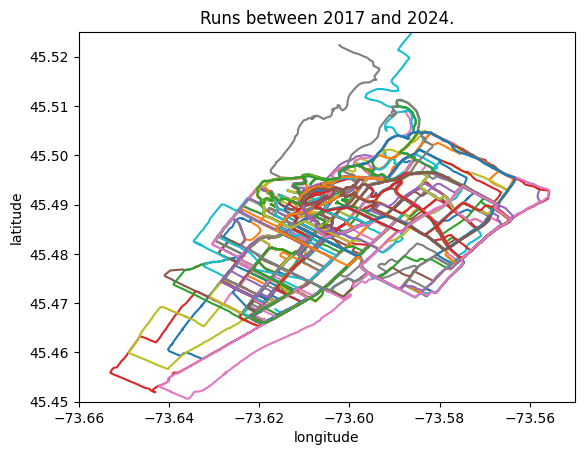

In [6]:
select_df = all_last_traces_info_df[(all_last_traces_info_df.index.year >= 2017) &
(all_last_traces_info_df.index.year <= 2024)].copy()
index_sel = np.array(select_df["indexNum"].tolist())

# plot the traces
for c, i in enumerate(index_sel):
    single_gps_trace_df = list_run_df[index_sel[c]]
    plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"])
    
plt.title("Runs between 2017 and 2024.")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis([-73.66, -73.55, 45.45, 45.525])
#plt.show()
plt.savefig("../tmp/output.jpg", facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

# Show all the runs by distance over the year

<Axes: xlabel='time'>

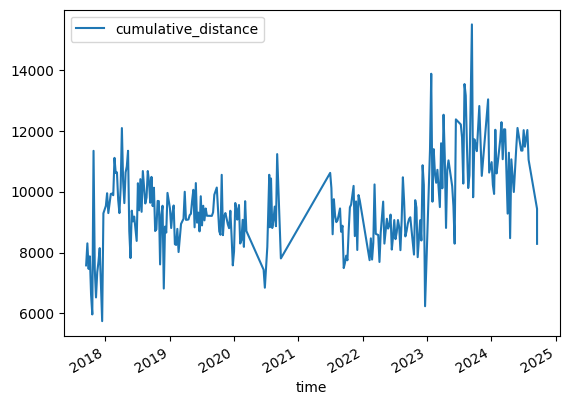

In [7]:
all_last_traces_info_df.plot.line(y="cumulative_distance")

# Overlay distances per run per year Vs day of the year

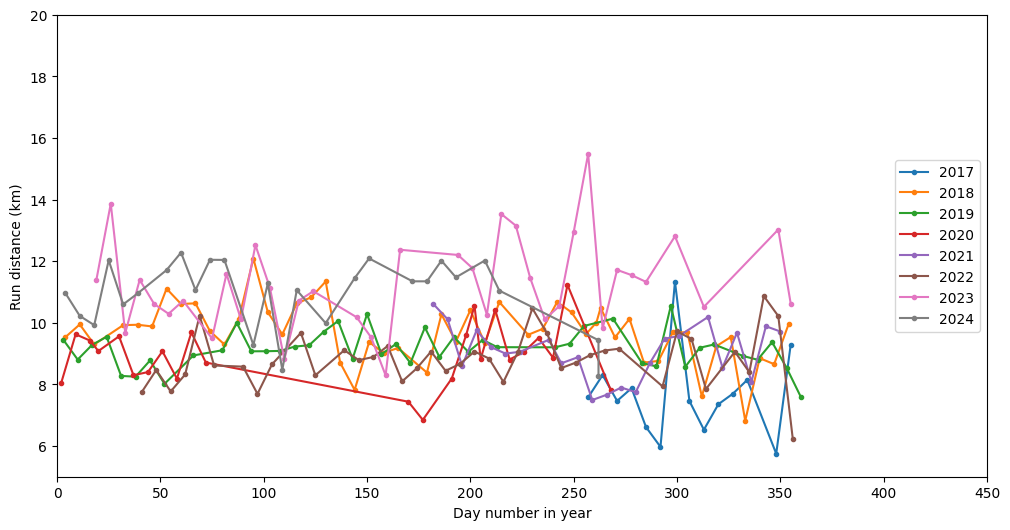

In [8]:
plt.figure(figsize=(12, 6))
vec_color = np.linspace(0.1,1,8)
for cc, aa in enumerate(np.arange(2017,2025)):
    sel_def   = all_last_traces_info_df[(all_last_traces_info_df.index.year == aa)] 
    sel_cumul = sel_def["cumulative_distance"].to_numpy() / 1000
    sel_index = sel_def["numberDay"].to_numpy()
    desired_array = [int(num_string) for num_string in sel_index]
    plt.plot(desired_array, sel_cumul,'.-',label=str(aa))#,color=[vec_color[cc],0,0])

plt.legend(loc=5)
plt.axis([0, 450, 5, 20])
plt.xlabel('Day number in year')
plt.ylabel('Run distance (km)')
plt.savefig("../tmp/allRunDistancesByYear.png".format(aa+1), bbox_inches='tight', dpi=300)

# Answering questions

+ what is the longest run, when did it happen?
+ what is the average distance per year?
+ is there still some cleaning I can do? I can see at least two of my recorded runs are too small meaning my gps probably collapsed at those dates, so what are those dates?


The longest did happen the Thursday 2023-9-14 and we ran 15.49km


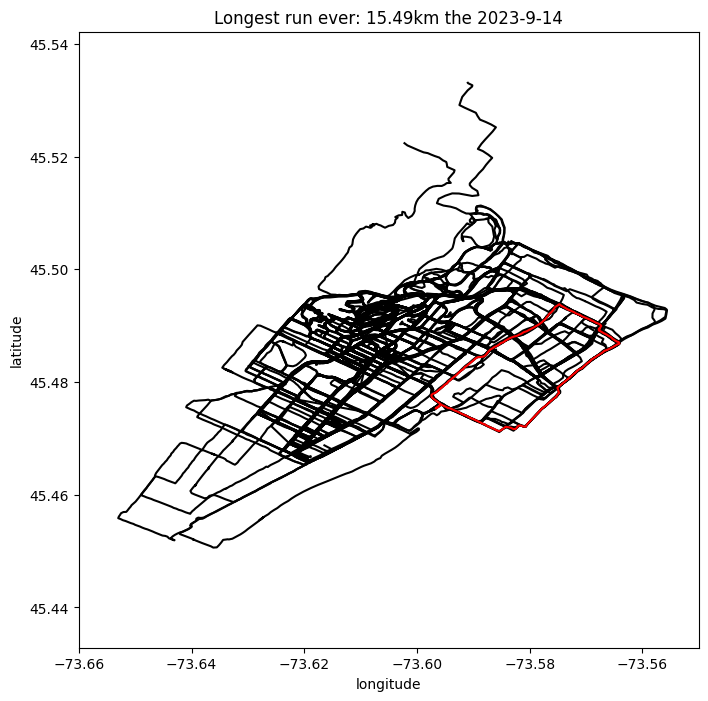

In [9]:
index_longest_run = all_last_traces_info_df["cumulative_distance"].argmax()
one_long_run_df   = list_run_df[-1]#index_longest_run]

year   = all_last_traces_info_df.index[index_longest_run].year
month  = all_last_traces_info_df.index[index_longest_run].month 
day    = all_last_traces_info_df.index[index_longest_run].day
length = all_last_traces_info_df["cumulative_distance"].iloc[index_longest_run] / 1000
date_in_text = "{0:1.0f}-{1:1.0f}-{2:1.0f}".format(year, month, day, length)

print("The longest did happen the Thursday {0:1.0f}-{1:1.0f}-{2:1.0f} and we ran {3:1.2f}km".format(year, month, day, length))
# plot all the traces
plt.rcParams['figure.figsize'] = [8, 8] 
fig, (ax1) = plt.subplots(1, 1,figsize=(8,8))

for c, i in enumerate(index_sel):
    single_gps_trace_df = list_run_df[index_sel[c]]
    plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"],c='k')
    
plt.plot(one_long_run_df["longitude"],one_long_run_df["latitude"],c='r',markersize=30)
plt.title("Longest run ever: {0:1.02f}km the ".format(length)+date_in_text+"")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis("equal");
ax1.set_xlim(-73.66, -73.55)    
ax1.set_ylim(45.45, 45.525)  
plt.savefig("../tmp/allRunTogther.png".format(aa+1), bbox_inches='tight', dpi=300)


# Display run by group of year

# Display by season

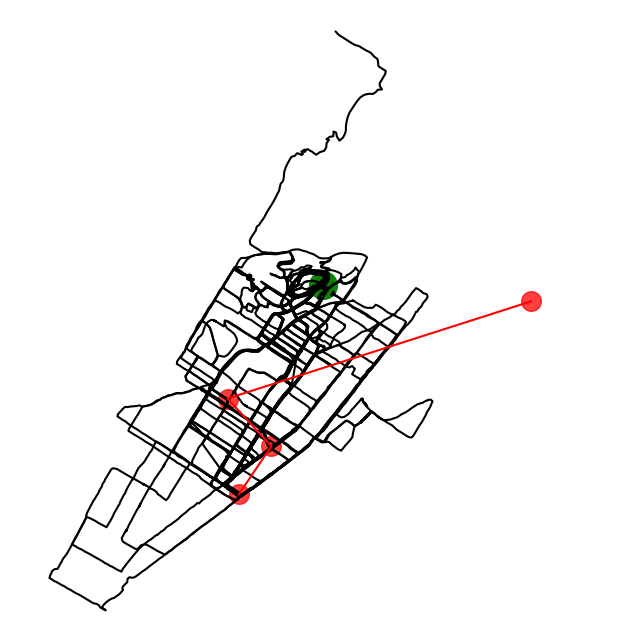

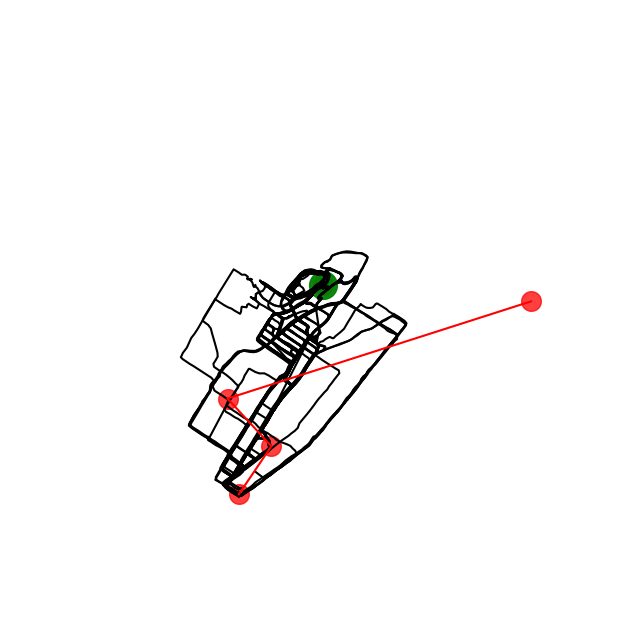

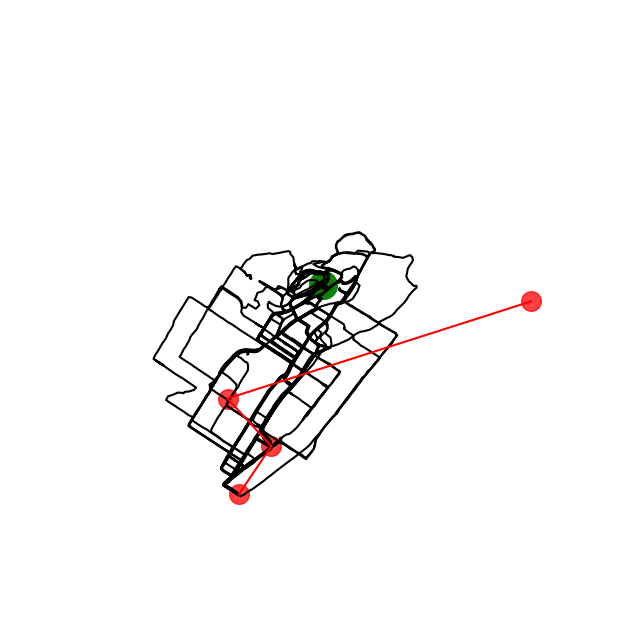

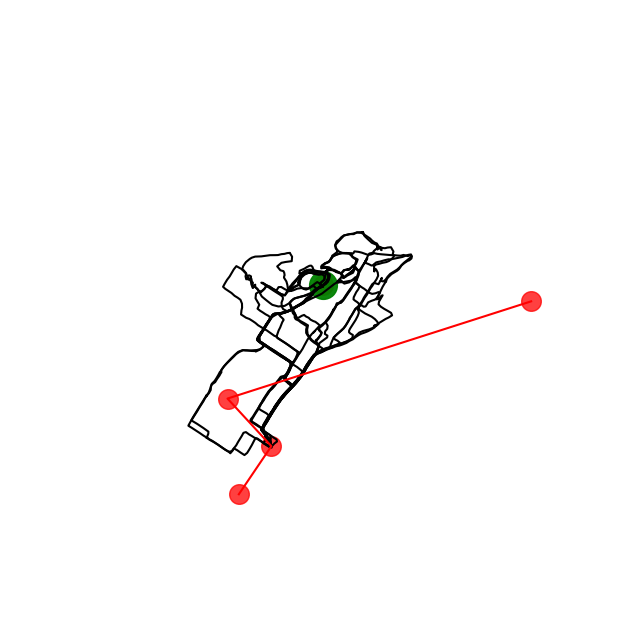

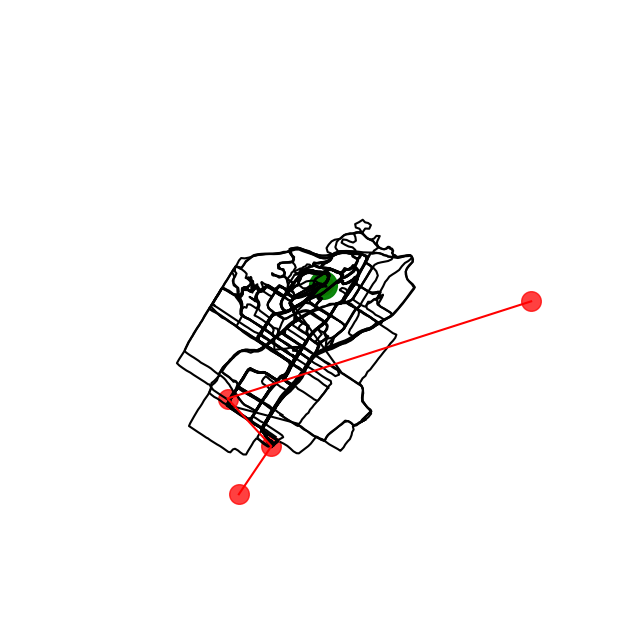

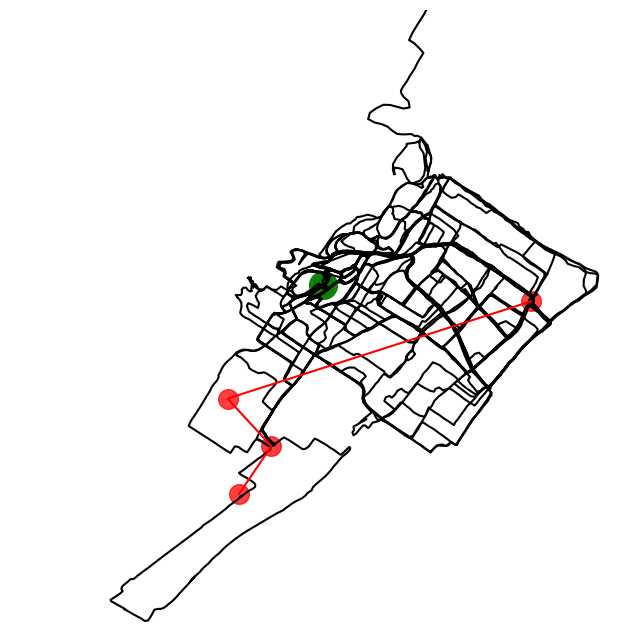

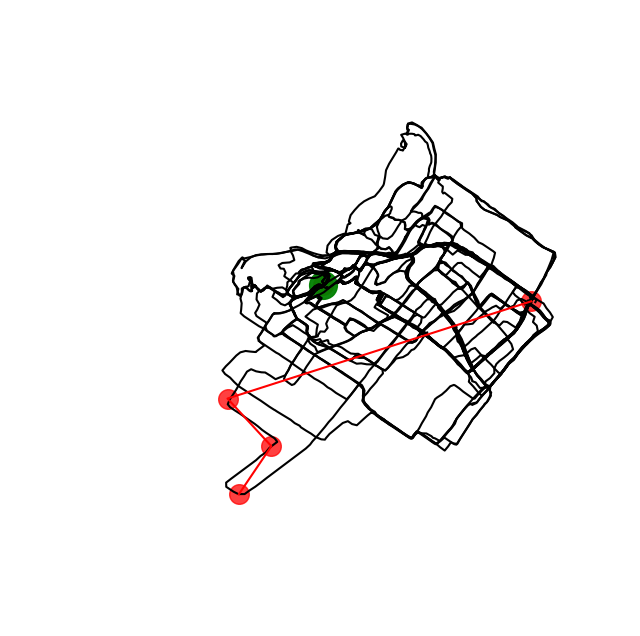

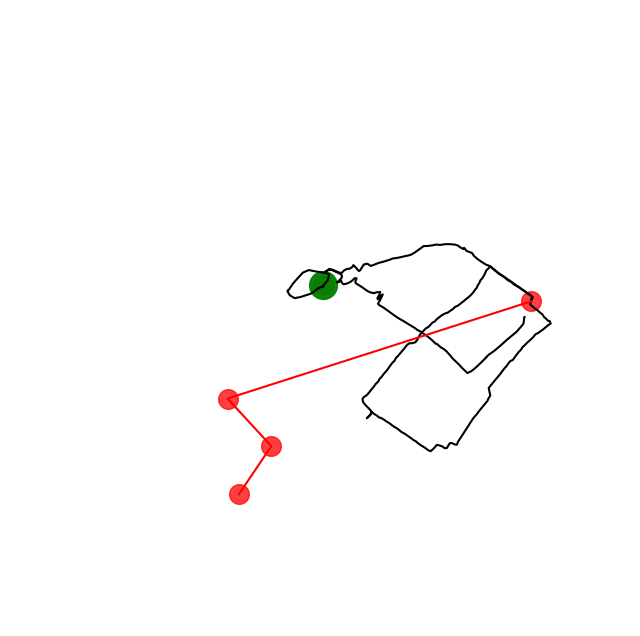

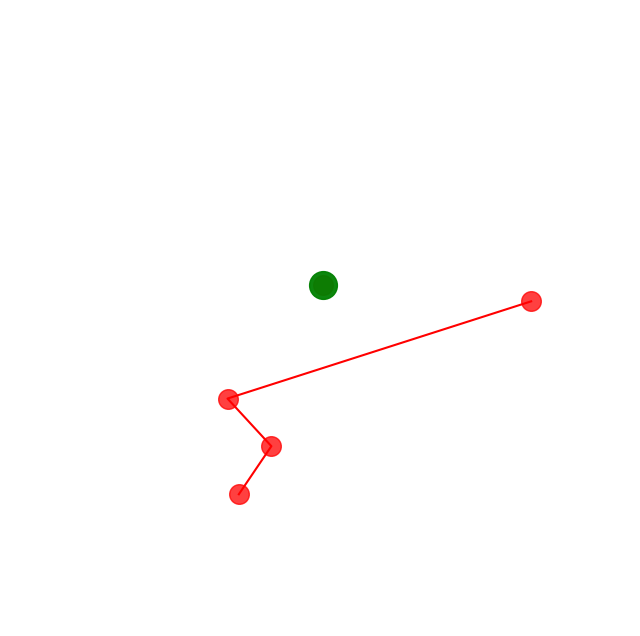

In [15]:
importlib.reload(ttrgpx)
list_starting_date =["2017-09-14","2018-09-14","2019-09-14","2020-09-14","2021-09-14","2022-09-14","2023-09-14","2024-09-14"]
for aa in np.arange(len(ttrgpx.list_starting_date)-1):
    ttrgpx.display_group_runs_by_dates(list_run_df, 
                                       all_last_traces_info_df, 
                                       [ttrgpx.list_starting_date[aa],ttrgpx.list_starting_date[aa+1]], 
                                       name_of_the_running_club = run_club_name, 
                                       title_ = "RRAC Season {0:1.0f}".format(aa+1))
    plt.savefig("../tmp/figSeason{0:1.0f}.png".format(aa+1), bbox_inches='tight', dpi=300)

# empty graph
importlib.reload(ttrgpx)
ttrgpx.display_RefeferencePoint()
plt.savefig("../tmp/figSeason666.png", bbox_inches='tight', dpi=300)


In [16]:
index_longest_run = select_df["cumulative_distance"].argmax()
index_longest_run

222

# Create montage of the images per season

In [20]:
!ls ../tmp/figS*

../tmp/figSeason1.png   ../tmp/figSeason4.png   ../tmp/figSeason666.png
../tmp/figSeason2.png   ../tmp/figSeason5.png   ../tmp/figSeason7.png
../tmp/figSeason3.png   ../tmp/figSeason6.png   ../tmp/figSeason8.png


In [23]:
command_line_imagemagick_ = "montage -tile 3x3 \
figSeason1.png figSeason2.png figSeason3.png \
figSeason4.png figSeason5.png figSeason6.png \
figSeason7.png figSeason8.png figSeason666.png \
-geometry 540x540+10+10 -background black imMontage33.jpg"
print(command_line_imagemagick_)

montage -tile 3x3 figSeason1.png figSeason2.png figSeason3.png figSeason4.png figSeason5.png figSeason6.png figSeason7.png figSeason8.png figSeason666.png -geometry 540x540+10+10 -background black imMontage33.jpg


# Idea of visualization

I could:
+ visualize run as polygon area
+ create group of runs an return convexhul
+ generate a date colum corresponding to the staring point